In [ ]:
# Bookworm


## Overview

In this project, you will build a simple question-answering agent that is able to learn from any text data you provide, and answer queries posed in natural language. You will use IBM Watson's cloud-based services to process the input text data and find relevant responses.



## Getting Started

In order to use Watson's cloud-based services, you first need to create an account on the [IBM Bluemix platform](https://console.ng.bluemix.net/).

<div>
    <div style="display: table-cell; width: 50%;">
        <img src="images/watson-logo.png" alt="IBM Watson logo" width="200" />
    </div>
    <div style="display: table-cell; width: 50%;">
        <img src="images/bluemix-logo.png" alt="IBM Bluemix logo" width="400" />
    </div>
</div>

Then, for each service you want to use, you have to create an instance of that service. You can continue with the tasks below, and create a service instance when indicated.

## 1. Create and configure Discovery service

Create an instance of the **Discovery** service. You will use this to process a set of text documents, and _discover_ relevant facts and relationships.

- Go to the [IBM Bluemix Catalog](https://console.ng.bluemix.net/catalog/?taxonomyNavigation=services&category=watson).
- Select the service you want, **Discovery**, under the **Watson** category.
- Enter a Service Name for that instance, e.g. **Disco1** and a Credential Name, e.g. **Disco1-Creds** (these are just for you to be able to refer to later, they do not affect the functioning of the service).
- You should be able to see your newly-created service in your [Services Dashboard](https://console.ng.bluemix.net/dashboard/services).
- Open the service instance, click on the **Service credentials** tab, and then **View credentials** under Actions. This is where you will find the username and password to use when connecting to the service.

<img src="images/discovery-creds.png" alt="Discovery Service - Credentials tab" width="800" />

Save the credentials for the discovery service in a JSON file in the current directory named `service-credentials.json` with the following format:

```json
{
    "discovery": {
        "username": "<your Discovery username here>",
        "password": "<your Discovery password here>"
    },
    "conversation": {
        "username": "",
        "password": ""
    }
}

```

You will be filling out the Conversation service credentials later, when you create an instance for it. Note that you should keep these credentials secret. Please do not turn them in with your submission!

### Connect to the service instance

Let's connect to the service instance you just created using IBM Watson's [Python SDK](https://github.com/watson-developer-cloud/python-sdk). You will first need to install the SDK:
```bash
pip install watson-developer-cloud
```

Now execute each code cell below using **`Shift+Enter`**, and complete any steps indicated by a **`TODO`** comment. For more information on the Discovery service, please read the [Documentation](https://www.ibm.com/watson/developercloud/doc/discovery/index.html) and look at the [API Reference](https://www.ibm.com/watson/developercloud/discovery/api/v1/?python) as needed.

In [1]:
# Usual Python imports
import sys
import os
import glob
import json

# BeautifulSoup, for parsing HTML
from bs4 import BeautifulSoup

# Matplotlib, for plotting
import matplotlib.pyplot as plt
%matplotlib inline

# Watson Python SDK
import watson_developer_cloud

# Utility functions
import helper

In [2]:
# Connect to the Discovery service instance
discovery_creds = helper.fetch_credentials('discovery')
discovery = watson_developer_cloud.DiscoveryV1(
    version='2016-11-07',
    username=discovery_creds['username'],
    password=discovery_creds['password'])

### Create an environment

The Discovery service organizes everything needed for a particular application in an _environment_. Let's create one called "Bookworm" for this project.

> _**Note**: It is okay to run this block multiple times - it will not create duplicate environments with the same name._

In [3]:
# Prepare an environment to work in
env, env_id = helper.fetch_object(
    discovery, "environment", "Bookworm",
    create=True, create_args=dict(
        description="A space to read and understand stories",  # feel free to edit
        size=0  # use 0 for free plan (see API reference for more on sizing)
    ))
print(json.dumps(env, indent=2))

Found environment: Bookworm (98421eaa-604c-4c42-b0d9-063cfb40389b)
{
  "environment_id": "98421eaa-604c-4c42-b0d9-063cfb40389b",
  "name": "Bookworm",
  "description": "A space to read and understand stories",
  "created": "2017-07-28T03:14:45.337Z",
  "updated": "2017-07-28T03:14:45.337Z",
  "status": "active",
  "read_only": false,
  "size": 0,
  "index_capacity": {
    "disk_usage": {
      "used_bytes": 10649348,
      "total_bytes": 4294967296,
      "used": "10.16 MB",
      "total": "4 GB",
      "percent_used": 0.25
    },
    "memory_usage": {
      "used_bytes": 663094088,
      "total_bytes": 1056309248,
      "used": "632.38 MB",
      "total": "1007.38 MB",
      "percent_used": 62.77
    }
  }
}


In [4]:
# View default configuration
cfg_id = discovery.get_default_configuration_id(environment_id=env_id)
cfg = discovery.get_configuration(environment_id=env_id, configuration_id=cfg_id)
print(json.dumps(cfg, indent=2))

{
  "configuration_id": "469088d2-ed3a-4a50-9422-93bd802e346e",
  "name": "Default Configuration",
  "description": "The configuration used by default when creating a new collection without specifying a configuration_id.",
  "created": "2017-07-28T03:14:45.389Z",
  "updated": "2017-07-28T03:14:45.389Z",
  "conversions": {
    "word": {
      "heading": {
        "fonts": [
          {
            "level": 1,
            "min_size": 24,
            "bold": false,
            "italic": false
          },
          {
            "level": 2,
            "min_size": 18,
            "max_size": 23,
            "bold": true,
            "italic": false
          },
          {
            "level": 3,
            "min_size": 14,
            "max_size": 17,
            "bold": false,
            "italic": false
          },
          {
            "level": 4,
            "min_size": 13,
            "max_size": 13,
            "bold": true,
            "italic": false
          }
        ],
    

In [5]:
# Test configuration on some sample text
data_dir = "data"
filename = os.path.join(data_dir, "sample.html")
with open(filename, "r") as f:
    res = discovery.test_document(environment_id=env_id, configuration_id=cfg_id, fileinfo=f)
print(json.dumps(res, indent=2))

{
  "status": "completed",
  "enriched_field_units": 1,
  "original_media_type": "text/html",
  "snapshots": [
    {
      "step": "html_input",
      "snapshot": {
        "html": "<html>\n<head>\n    <title>Star Wars: Episode IV - A New Hope (Opening Crawl)</title>\n</head>\n<body>\n    <article>\n        <h1>Star Wars: Episode IV - A New Hope (Opening Crawl)</h1>\n        <p>\n            It is a period of civil war. Rebel spaceships, striking from a hidden base, have won their first victory against the evil Galactic Empire.\n        </p><p>\n            During the battle, Rebel spies managed to steal secret plans to the Empire's ultimate weapon, the DEATH STAR, an armored space station with enough power to destroy an entire planet.\n        </p><p>\n            Pursued by the Empire's sinister agents, Princess Leia races home aboard her starship, custodian of the stolen plans that can save her people and restore freedom to the galaxy...\n        </p>\n    </article>\n</body>"
     

### Analyze test output

The results returned by the service contain a _snapshot_ of the information extracted at each step of processing - document conversions, enrichments and normalizations. We are interested in the output of applying enrichments (`"enrichments_output"`) or after normalizing them (`"normalizations_output"`). These should be identical if no post-processing/normalizations were specified in the configuration.

/home/dfam/anaconda2/envs/DLAIND/lib/python3.6/site-packages/matplotlib/cbook.py:136: MatplotlibDeprecationWarning: The Vega10 colormap was deprecated in version 2.0. Use tab10 instead.
  warnings.warn(message, mplDeprecation, stacklevel=1)


(-0.5, 799.5, 599.5, -0.5)

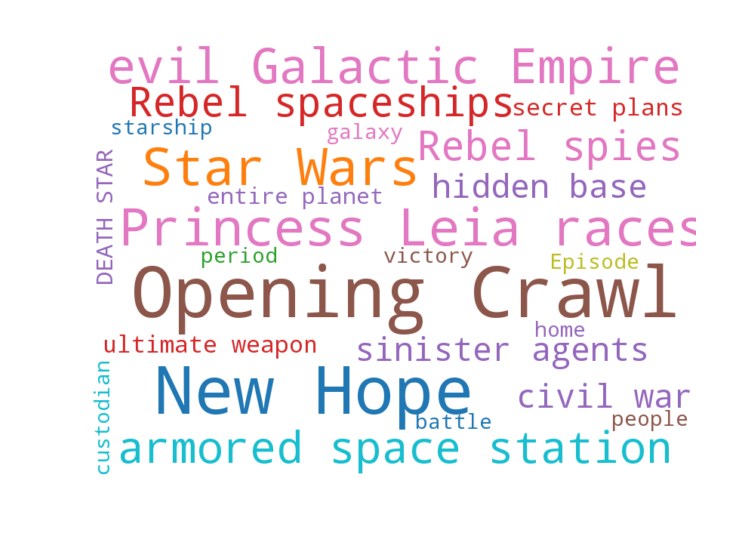

In [7]:
# Visualize keywords by relevance as a wordcloud
from wordcloud import WordCloud

wc_data = { w["text"]: w["relevance"] for w in output["enriched_text"]["keywords"] }
wc = WordCloud(width=400, height=300, scale=2, background_color="white", colormap="Vega10")
wc.generate_from_frequencies(wc_data)  # use precomputed relevance instead of frequencies

plt.figure(figsize=(4, 3), dpi=200)
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")

In [8]:
# Prepare a collection of documents to use
col, col_id = helper.fetch_object(discovery, "collection", "Story Chunks", environment_id=env_id,
    create=True, create_args=dict(
        environment_id=env_id, configuration_id=cfg_id,
        description="Stories and plots split up into chunks suitable for answering"
    ))
print(json.dumps(col, indent=2))

Found collection: Story Chunks (75541c46-4caf-437f-ac81-37dc714ff04d)
{
  "collection_id": "75541c46-4caf-437f-ac81-37dc714ff04d",
  "name": "Story Chunks",
  "configuration_id": "469088d2-ed3a-4a50-9422-93bd802e346e",
  "language": "en",
  "status": "active",
  "description": "Stories and plots split up into chunks suitable for answering",
  "created": "2017-07-28T03:23:10.939Z",
  "updated": "2017-07-28T03:23:10.939Z",
  "document_counts": {
    "available": 191,
    "processing": 0,
    "failed": 0
  },
  "training_status": {
    "data_updated": "",
    "total_examples": 0,
    "sufficient_label_diversity": false,
    "processing": false,
    "minimum_examples_added": false,
    "successfully_trained": "",
    "available": false,
    "notices": 0,
    "minimum_queries_added": false
  }
}


In [9]:
# Add documents to collection
doc_ids = []  # to store the generated id for each document added
for filename in glob.glob(os.path.join(data_dir, "Star-Wars", "*.html")):
    print("Adding file:", filename)
    with open(filename, "r") as f:
        # Split each individual <p> into its own "document"
        doc = f.read()
        soup = BeautifulSoup(doc, 'html.parser')
        for i, p in enumerate(soup.find_all('p')):
            doc_info = discovery.add_document(environment_id=env_id, collection_id=col_id,
                file_data=json.dumps({"text": p.get_text(strip=True)}),
                mime_type="application/json",
                metadata={"title": soup.title.get_text(strip=True)})
            doc_ids.append(doc_info["document_id"])
print("Total", len(doc_ids), "documents added.")

Adding file: data/Star-Wars/Episode-II_Attack-of-the-Clones.html
Adding file: data/Star-Wars/Episode-I_The-Phantom-Menace.html
Adding file: data/Star-Wars/Episode-VII_The-Force-Awakens.html
Adding file: data/Star-Wars/Episode-V_The-Empire-Strikes-Back.html
Adding file: data/Star-Wars/Rogue-One.html
Adding file: data/Star-Wars/Episode-III_Revenge-of-the-Sith.html
Adding file: data/Star-Wars/Episode-VI_Return-of-the-Jedi.html
Adding file: data/Star-Wars/Episode-IV_A-New-Hope.html
Total 42 documents added.


In [10]:
# View collection details to verify all documents have been processed
col, col_id = helper.fetch_object(discovery, "collection", "Story Chunks", environment_id=env_id)
print(json.dumps(col, indent=2))

Found collection: Story Chunks (75541c46-4caf-437f-ac81-37dc714ff04d)
{
  "collection_id": "75541c46-4caf-437f-ac81-37dc714ff04d",
  "name": "Story Chunks",
  "configuration_id": "469088d2-ed3a-4a50-9422-93bd802e346e",
  "language": "en",
  "status": "active",
  "description": "Stories and plots split up into chunks suitable for answering",
  "created": "2017-07-28T03:23:10.939Z",
  "updated": "2017-07-28T03:23:10.939Z",
  "document_counts": {
    "available": 233,
    "processing": 0,
    "failed": 0
  },
  "training_status": {
    "data_updated": "",
    "total_examples": 0,
    "sufficient_label_diversity": false,
    "processing": false,
    "minimum_examples_added": false,
    "successfully_trained": "",
    "available": false,
    "notices": 0,
    "minimum_queries_added": false
  }
}


In [11]:
# List all fields extracted
discovery.list_collection_fields(environment_id=env_id, collection_id=col_id)

{'fields': [{'field': '75541c46-4caf-437f-ac81-37dc714ff04d.mappings.document._all.analyzer',
   'type': 'english'},
  {'field': 'enriched_text', 'type': 'nested'},
  {'field': 'extracted_metadata', 'type': 'nested'},
  {'field': 'metadata', 'type': 'nested'},
  {'field': 'text', 'type': 'string'},
  {'field': 'text.analyzer', 'type': 'english'},
  {'field': 'enriched_text.properties.concepts', 'type': 'nested'},
  {'field': 'enriched_text.properties.docSentiment', 'type': 'nested'},
  {'field': 'enriched_text.properties.entities', 'type': 'nested'},
  {'field': 'enriched_text.properties.keywords', 'type': 'nested'},
  {'field': 'enriched_text.properties.language', 'type': 'string'},
  {'field': 'enriched_text.properties.language.analyzer', 'type': 'english'},
  {'field': 'enriched_text.properties.relations', 'type': 'nested'},
  {'field': 'enriched_text.properties.status', 'type': 'string'},
  {'field': 'enriched_text.properties.status.analyzer', 'type': 'english'},
  {'field': 'enric

In [12]:
# A simple query
results = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
        "query": "enriched_text.relations.subject.text:\"Jar Jar\"",
        "return": "metadata.title,text"
    })
print(json.dumps(results, indent=2))

{
  "matching_results": 12,
  "results": [
    {
      "id": "117eb6d5-1df5-4b21-9405-9c6c530d314c",
      "score": 3.0004668,
      "metadata": {
        "title": "Star Wars: Episode I - The Phantom Menace"
      },
      "text": "Supreme Chancellor Valorum, leader of the Galactic Republic, dispatches Jedi Knight Qui-Gon Jinn and his apprentice, Obi-Wan Kenobi, to negotiate with the Trade Federation leadership to end a blockade of battleships around the planet Naboo. Darth Sidious, a Sith Lord and the Trade Federation's secret adviser, orders Federation Viceroy Nute Gunray to kill the Jedi and invade Naboo with an army of battle droids. The Jedi escape and flee to Naboo, where Qui-Gon saves a Gungan outcast, Jar Jar Binks, from being run over and killed by a droid tank during the invasion. Indebted to the Jedi, Jar Jar leads them to an underwater Gungan city. The Jedi unsuccessfully try to persuade the Gungan leader, Boss Nass, into helping the people of Naboo, though they are able to

In [13]:
# A simple query
results = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
        "query": "enriched_text.relations.subject.text:\"Obi-Wan Kenobi\"",
        "return": "metadata.title,text"
    })
print(json.dumps(results, indent=2))

{
  "matching_results": 16,
  "results": [
    {
      "id": "6e8487fd-f77f-40d4-a153-c9a372f177e0",
      "score": 4.27401,
      "metadata": {
        "title": "Star Wars: Episode III - Revenge of the Sith"
      },
      "text": "Three years after the the start of the Clone Wars between the Galactic Republic and the Confederacy of Independent Systems, war has gripped the galaxy. During a space battle over the planet Coruscant, Jedi Knights Obi-Wan Kenobi and Anakin Skywalker lead a mission to rescue the kidnapped Supreme Chancellor Palpatine from Separatist commander General Grievous. After infiltrating Grievous's flagship, the Jedi battle Count Dooku. Anakin subdues Dooku, and on Palpatine's urging, executes him. Grievous flees the battle-torn cruiser, which the Jedi crash-land on Coruscant. There, Anakin reunites with his wife, Padm\u00e9 Amidala, who reveals she is pregnant. While initially excited, Anakin begins to have prophetic visions of Padm\u00e9 dying in childbirth, and hi

In [14]:
# Connect to the Conversation service instance with your username and password from the Service Credentials tab in service-credentials.json
conversation_creds = helper.fetch_credentials('conversation')
conversation = watson_developer_cloud.ConversationV1(
    version='2017-02-03',
    username=conversation_creds['username'],
    password=conversation_creds['password'])

Fetch the workspace you just created called "Bookworm".

In [15]:
wrk, wrk_id = helper.fetch_object(conversation, "workspace", "Bookworm")
print(json.dumps(wrk, indent=2))

Found workspace: Bookworm (199c6e7b-a991-4d22-89c2-466605a16297)
{
  "name": "Bookworm",
  "created": "2017-07-28T03:35:49.762Z",
  "updated": "2017-07-28T05:38:17.266Z",
  "language": "en",
  "metadata": null,
  "description": "I know a lot of stories. Ask me a question!",
  "workspace_id": "199c6e7b-a991-4d22-89c2-466605a16297",
  "learning_opt_out": null,
  "status": "Available"
}


Collect all the entities from the Discovery service collection.

In [16]:
# all the entities from the collection and group them by type
response = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
        "return": "enriched_text.entities.type,enriched_text.entities.text"
    })

# Group individual entities by type ("Person", "Location", etc.)
entities_by_type = {}
for document in response["results"]:
    for entity in document["enriched_text"]["entities"]:
        if entity["type"] not in entities_by_type:
            entities_by_type[entity["type"]] = set()
        entities_by_type[entity["type"]].add(entity["text"])

# Ignore case to avoid duplicates
for entity_type in entities_by_type:
    entities_by_type[entity_type] = {
        e.lower(): e for e in entities_by_type[entity_type]
    }.values()

# Restructure for loading into Conversation workspace
entities_grouped = [{
    "entity": entity_type,
    "values": [{"value": entity} for entity in entities]}
        for entity_type, entities in entities_by_type.items()]
entities_grouped


[{'entity': 'Organization',
  'values': [{'value': 'Jedi Council'},
   {'value': 'Galactic Senate'},
   {'value': 'Trade Federation'},
   {'value': 'Federation'},
   {'value': 'droid army'},
   {'value': 'Force'}]},
 {'entity': 'Person',
  'values': [{'value': 'Darth Maul'},
   {'value': 'Han Solo'},
   {'value': 'Darth Sidious'},
   {'value': 'Fett'},
   {'value': 'Leia'},
   {'value': 'Poe Dameron'},
   {'value': 'Boss Nass'},
   {'value': 'Han'},
   {'value': 'Rey'},
   {'value': 'Ben'},
   {'value': 'Obi-Wan Kenobi'},
   {'value': 'Gunray'},
   {'value': 'Shmi'},
   {'value': 'Watto'},
   {'value': 'Chancellor Valorum'},
   {'value': 'Obi-Wan'},
   {'value': 'Lando'},
   {'value': 'Poe'},
   {'value': 'Anakin Skywalker'},
   {'value': 'Palpatine'},
   {'value': 'Padmé'},
   {'value': 'Zam Wesell'},
   {'value': 'Qui-Gon'},
   {'value': 'Anakin'},
   {'value': 'Senator Padmé Amidala'},
   {'value': 'Luke'},
   {'value': 'Queen Amidala'},
   {'value': 'Amidala'},
   {'value': 'Ren'},

Update the workspace with these entities and verify that have been added correctly.

In [17]:
#grouped entities to the Conversation workspace
conversation.update_workspace(workspace_id=wrk_id, entities=entities_grouped)

workspace_details = conversation.get_workspace(workspace_id=wrk_id, export=True)
print(json.dumps(workspace_details["entities"], indent=2))

[
  {
    "type": null,
    "entity": "GeographicFeature",
    "source": null,
    "values": [
      {
        "value": "Starkiller Base",
        "created": "2017-07-28T06:29:55.907Z",
        "updated": "2017-07-28T06:29:55.907Z",
        "metadata": null,
        "synonyms": []
      }
    ],
    "created": "2017-07-28T06:29:55.907Z",
    "updated": "2017-07-28T06:29:55.907Z",
    "open_list": null,
    "description": null
  },
  {
    "type": null,
    "entity": "JobTitle",
    "source": null,
    "values": [
      {
        "value": "Chancellor",
        "created": "2017-07-28T06:29:55.907Z",
        "updated": "2017-07-28T06:29:55.907Z",
        "metadata": null,
        "synonyms": []
      },
      {
        "value": "engineer",
        "created": "2017-07-28T06:29:55.907Z",
        "updated": "2017-07-28T06:29:55.907Z",
        "metadata": null,
        "synonyms": []
      }
    ],
    "created": "2017-07-28T06:29:55.907Z",
    "updated": "2017-07-28T06:29:55.907Z",
    "open

### Test dialog

Let's run through a test dialog to demonstrate how the system transitions to one of the nodes you defined above.

In [18]:
# Testing the dialog flow

# Start conversation with a blank message
results = conversation.message(workspace_id=wrk_id, message_input={})
context = results["context"]

# ask a sample question
question= "Who is Luke's father?"
results = conversation.message(workspace_id=wrk_id, message_input={
    "text": question,
    "context": context
})
print(json.dumps(results, indent=2))

{
  "intents": [
    {
      "intent": "who",
      "confidence": 1
    }
  ],
  "entities": [
    {
      "entity": "Person",
      "location": [
        7,
        11
      ],
      "value": "Luke",
      "confidence": 1
    }
  ],
  "input": {
    "text": "Who is Luke's father?",
    "context": {
      "conversation_id": "8be3d581-5a11-42d2-9bb3-00da7d102e4c",
      "system": {
        "dialog_stack": [
          {
            "dialog_node": "root"
          }
        ],
        "dialog_turn_counter": 1,
        "dialog_request_counter": 1,
        "_node_output_map": {
          "Welcome": [
            0
          ]
        },
        "branch_exited": true,
        "branch_exited_reason": "completed"
      }
    }
  },
  "output": {
    "text": [
      "Let me look that shit up for you!"
    ],
    "nodes_visited": [
      "Person"
    ],
    "log_messages": []
  },
  "context": {
    "conversation_id": "960a7892-108a-4186-a90d-f8a0607e25cf",
    "system": {
      "dialog_stack": 

In [19]:

# sample question through Conversation service

question= "Who killed Han Solo?"
results = conversation.message(workspace_id=wrk_id, message_input={
    "text": question,
    "context": context
})
print(json.dumps(results, indent=2))

{
  "intents": [
    {
      "intent": "who",
      "confidence": 0.951561450958252
    }
  ],
  "entities": [
    {
      "entity": "Person",
      "location": [
        11,
        19
      ],
      "value": "Han Solo",
      "confidence": 1
    }
  ],
  "input": {
    "text": "Who killed Han Solo?",
    "context": {
      "conversation_id": "8be3d581-5a11-42d2-9bb3-00da7d102e4c",
      "system": {
        "dialog_stack": [
          {
            "dialog_node": "root"
          }
        ],
        "dialog_turn_counter": 1,
        "dialog_request_counter": 1,
        "_node_output_map": {
          "Welcome": [
            0
          ]
        },
        "branch_exited": true,
        "branch_exited_reason": "completed"
      }
    }
  },
  "output": {
    "text": [
      "Let me look that shit up for you!"
    ],
    "nodes_visited": [
      "Person"
    ],
    "log_messages": []
  },
  "context": {
    "conversation_id": "21461c91-f911-4ef9-a337-7f5e4ffea91b",
    "system": {
  

In [20]:
# intent(s) the user expressed (typically a single one)
query_intents = [intent["intent"] for intent in results["intents"]]
print("Intent(s):", query_intents)

# entities found in the question text
query_entities = [entity["value"] for entity in results["entities"]]
print("Entities:", query_entities)

# dialog node was triggered
query_dialognodes = [entity["entity"] for entity in results["entities"]]
print("Dialognodes:", query_dialognodes)


Intent(s): ['who']
Entities: ['Han Solo']
Dialognodes: ['Person']


In [21]:
query_results = discovery.query(environment_id=env_id, collection_id=col_id,
    query_options={
        "query": "text:{}".format(",".join("\"{}\"".format(e) for e in query_entities)),
        "return": "enriched_text.entities.type,enriched_text.entities.text,enriched_text.entities.relevance"
    })
print(json.dumps(query_results, indent=2))

{
  "matching_results": 22,
  "results": [
    {
      "id": "e42105c5-1efb-4004-b6d5-4040a8d16fb9",
      "score": 2.4285977,
      "enriched_text": {
        "entities": [
          {
            "text": "Han Solo",
            "type": "Person",
            "relevance": 0.806577
          },
          {
            "text": "General Hux",
            "type": "Company",
            "relevance": 0.241239
          },
          {
            "text": "Ren",
            "type": "Person",
            "relevance": 0.237616
          }
        ]
      }
    },
    {
      "id": "79bc5f10-011a-47c6-b1ad-e6999bf20a0b",
      "score": 2.4285977,
      "enriched_text": {
        "entities": [
          {
            "text": "Han Solo",
            "type": "Person",
            "relevance": 0.806577
          },
          {
            "text": "General Hux",
            "type": "Company",
            "relevance": 0.241239
          },
          {
            "text": "Ren",
            "type": "Per

In [22]:


# top_entities returns the enriched_text.entities in the paragraph with the highest score
# that wasn't an entity from the original query
top_entities = [query['text'] for query in query_results['results'][0]['enriched_text']['entities'] \
                if query['text'] not in query_entities]
# return the highest ranked
print(question)
print(top_entities[0])

Who killed Han Solo?
General Hux
